#Import Libraries and Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%load_ext tensorboard
!rm -rf ./logs/ 

### Import Friedman1 dataset


Friedman 1 Dataset 

*   y(X) = 10 * sin(pi * X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 + 10 * X[:, 3] + 5 * X[:, 4] + noise * N(0, 1).
* Only 5 features used to calculate y 
* Noise is Gaussian 
* 1000 datapoints and 10 features used in the following experiment 


In [ ]:
import friedman1Dataset
import bostonDataset
import ABC_train_test
import numpy as np
import network
import statsModel
import dataset
import torch 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
import tensorflow as tf
from torch.utils.data import Dataset,DataLoader 
from torch.utils.tensorboard import SummaryWriter

In [ ]:
X, Y = friedman1Dataset.friedman1_data()
# X = (constant , X0 , X1 , X2 , X3 , X4 , X5 , X6 , X7 , X8 , X9)

### Stats Model

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     341.9
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          1.04e-312
Time:                        14:11:23   Log-Likelihood:                -671.71
No. Observations:                1000   AIC:                             1365.
Df Residuals:                     989   BIC:                             1419.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.812e-16      0.015  -5.85e-14      1.0

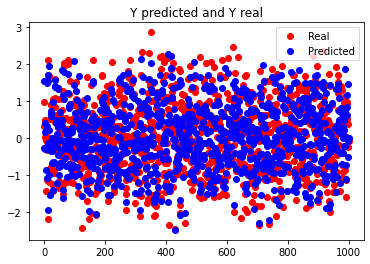

In [ ]:
#Fit the Stats model 
[coeff,Ypred] = statsModel.statsModel(X,Y)

**Observation**: the coefficients of the stats model from x6 to x10 are close to zero. Since only 5 features out of 10 are used to calculate y in the actual model 

# GAN Model

In [ ]:
real_dataset = dataset.CustomDataset(X,Y)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
generator = network.ComplexGenerator(coeff).to(device)
discriminator = network.Discriminator(coeff,100).to(device)
criterion = torch.nn.BCEWithLogitsLoss()
lr = 0.01 #learning rate 
beta_1 = 0.5 
beta_2 = 0.999
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta_1, beta_2))
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr, betas=(beta_1, beta_2))

In [ ]:
n_epochs = 30000
batch_size = 500
mean = 1 #ABC Generator considers stats model coefficients 
variance = 0.001 

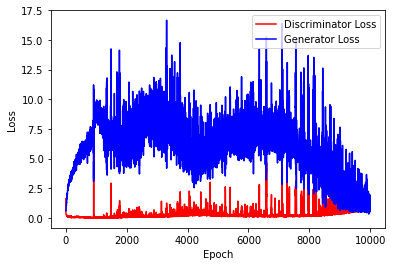

In [ ]:
train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,real_dataset,batch_size, n_epochs,criterion,device)

In [ ]:
train_test.test_generator(generator,real_dataset,device)

NameError: ignored

# ABC GAN Model

### ABC - GAN Model 

In [ ]:
#Generate Dataset for Training the GAN 
dataset = dataset.CustomDataset(X,Y)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#Initialize Generator and Discriminator 
disc = network.Discriminator(coeff,100).to(device)
gen = network.ComplexGenerator(coeff).to(device)

lr = 0.01 #learning rate 
beta_1 = 0.5 
beta_2 = 0.999
criterion = torch.nn.BCEWithLogitsLoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta_1, beta_2))
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr, betas=(beta_1, beta_2))

In [ ]:
#Training the GAN Model 
n_epochs = 10000
batch_size = 500
mean = 1 #ABC Generator considers stats model coefficients 
variance = 0.001 
ABC_train_test.training_GAN(disc,gen,disc_opt,gen_opt,dataset,n_epochs,batch_size,criterion,coeff,mean,variance,device)

In [ ]:
#Test the generator 
ABC_train_test.test_generator(gen,dataset,coeff,mean,variance,device)

**Sanity Check**

In [ ]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Visualisation of Trained GAN Generator**

In [ ]:
for name, param in gen.named_parameters():
    print(name,param)